# Laboratorio 1
* Statistical Learning 2
* Silvio Urizar
* 23008607

## Descripción

Es necesario analizar 2 sets de imágenes diferentes y poder clasificarlas correctamente mediante algoritmos de redes neuronales.

## Problema 1

Descargar y explorar dos sets de imágenes mediante tensorflow

### Dataset 1

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [2]:
## Se carga el primer dataset

builder1 = tfds.builder('malaria')
(MalariaTrain,MalariaTest), info1 = tfds.load(name ='malaria', with_info = True, split = ['train[:20%]','train[50%:55%]'])


In [3]:
info1

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear i

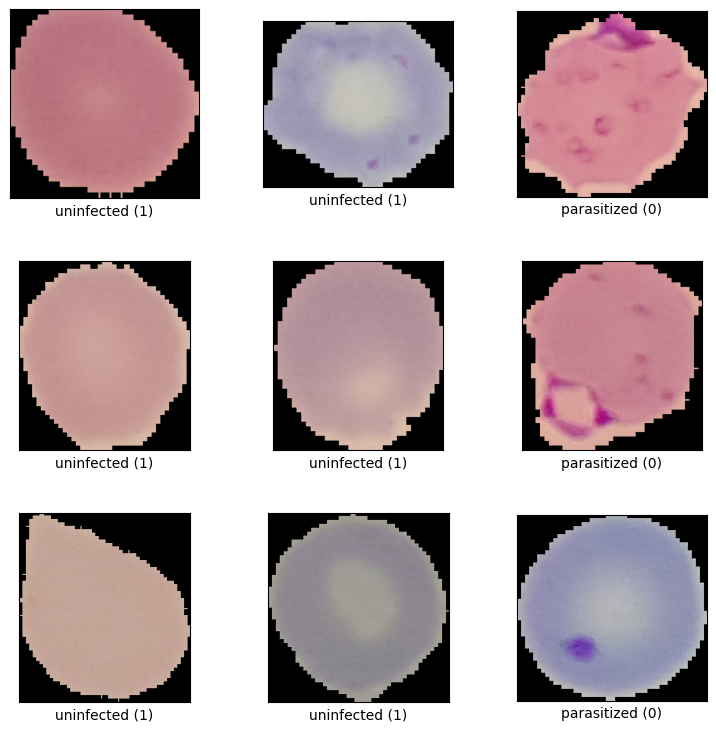

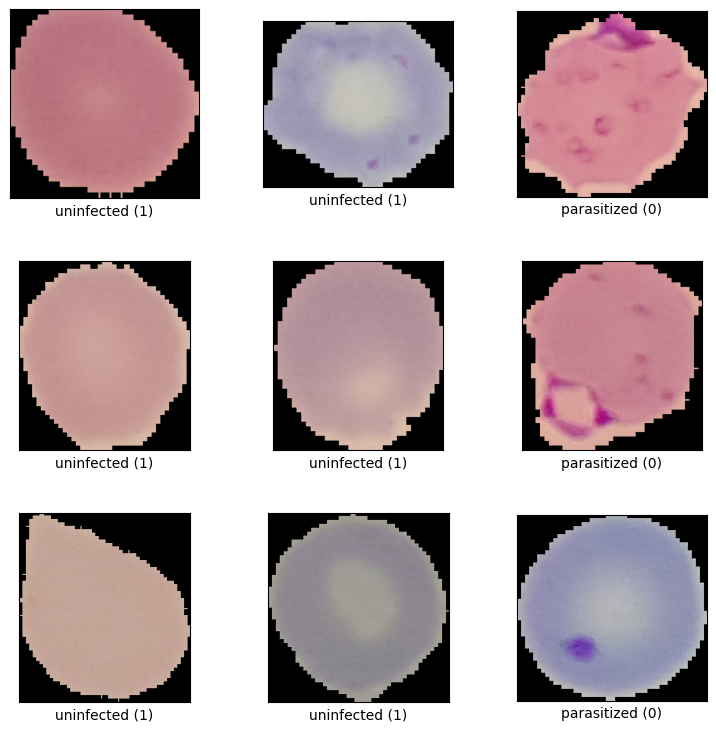

In [4]:
## Se ven ejemplos del set de entrenamiento

tfds.show_examples(MalariaTrain,info1)

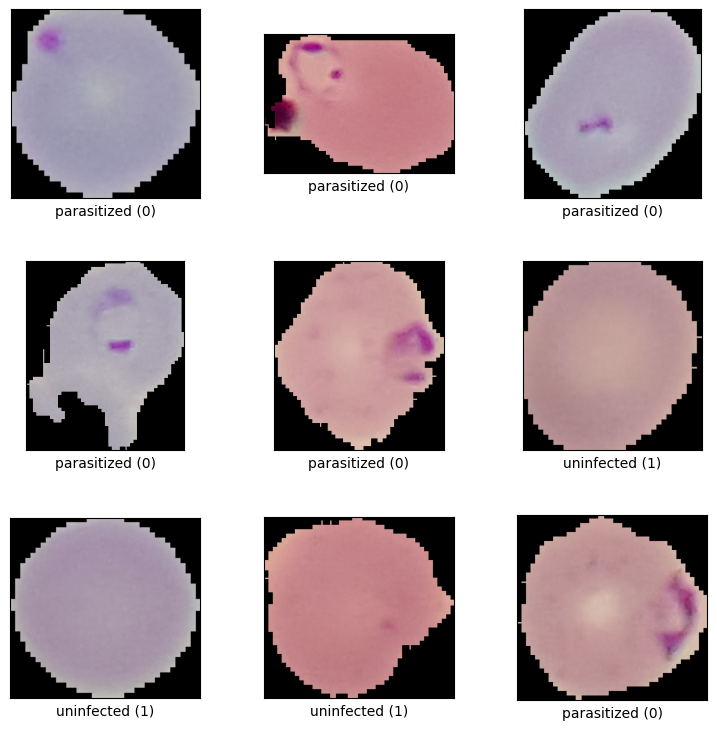

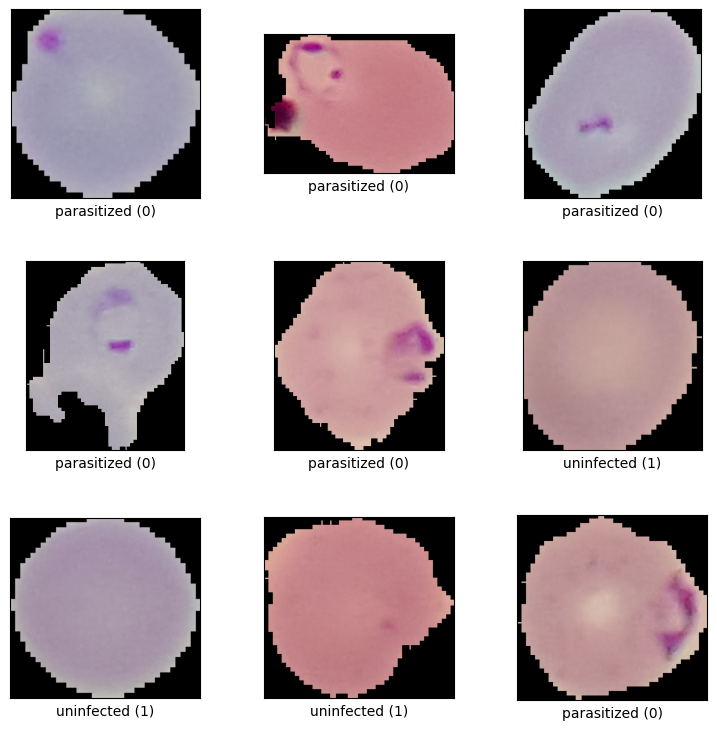

In [5]:
## Se ven ejemplos del set de pruebas
tfds.show_examples(MalariaTest,info1)

In [6]:
### Obteniendo imágenes y labels

ImTrain = np.array([img['image'].numpy()[:,:,0] for img in MalariaTrain])
LabTrain = np.array([label['label'].numpy() for label in MalariaTrain])

<ipython-input-6-39eb5cbdb1a9>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ImTrain = np.array([img['image'].numpy()[:,:,0] for img in MalariaTrain])


In [7]:
MalTest = np.array([img['image'].numpy()[:,:,0] for img in MalariaTest])
MLabTest = np.array([label['label'].numpy() for label in MalariaTest])

<ipython-input-7-1f4836071647>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  MalTest = np.array([img['image'].numpy()[:,:,0] for img in MalariaTest])


In [8]:
#forma de imágenes
ImTrain.shape

(5512,)

Esto significa que las imágenes tienen distintas dimensiones. Habrá que igualarlas para los análisis

In [9]:
### Tipos de labels
np.unique(LabTrain)

array([0, 1])

La etiqueta 0 es de una célula parasítica, y la etiqueta 1 es de una célula sana

In [10]:
### Dataset #2
builder2 = tfds.builder('colorectal_histology')
(ColTest,ColTrain), info2 = tfds.load(name = 'colorectal_histology', with_info = True, split = ['train[:50%]','train[60%:75%]'], shuffle_files= True)

In [11]:
info2

tfds.core.DatasetInfo(
    name='colorectal_histology',
    full_name='colorectal_histology/2.0.0',
    description="""
    Classification of textures in colorectal cancer histology. Each example is a 150 x 150 x 3 RGB image of one of 8 classes.
    """,
    homepage='https://zenodo.org/record/53169#.XGZemKwzbmG',
    data_path='/root/tensorflow_datasets/colorectal_histology/2.0.0',
    file_format=tfrecord,
    download_size=246.14 MiB,
    dataset_size=179.23 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(150, 150, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=8),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=5000, num_shards=2>,
    },
    citation="""@article{kather2016multi,
      title={Multi-class texture analysis in colorectal cancer histology},
      author={Kather, Jakob Nikolas and Weis, Cleo

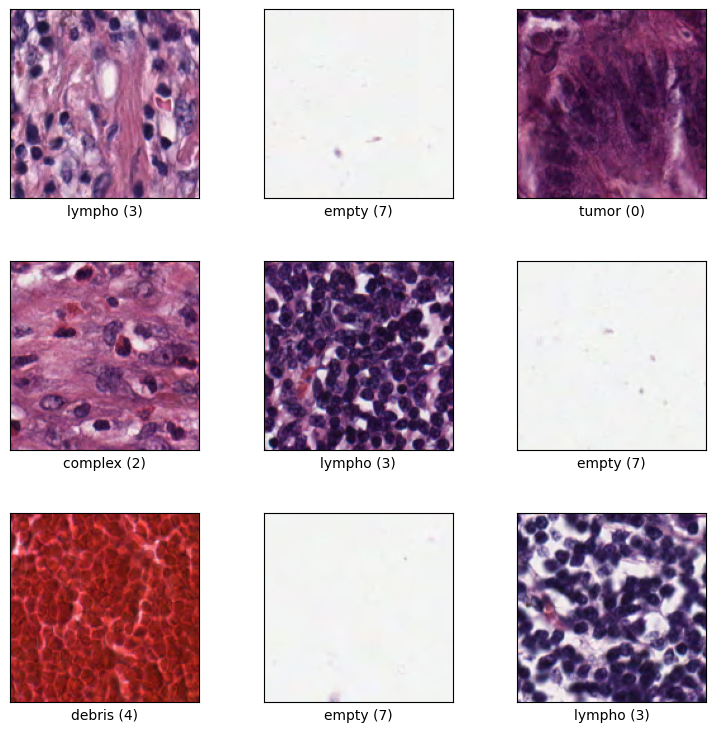

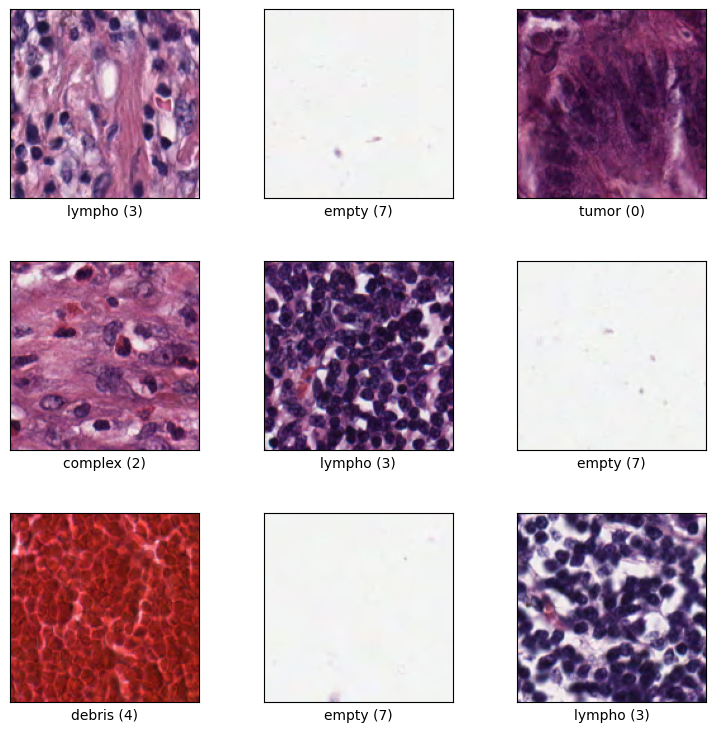

In [12]:
## Se muestran ejemplos
tfds.show_examples(ColTrain,info2)

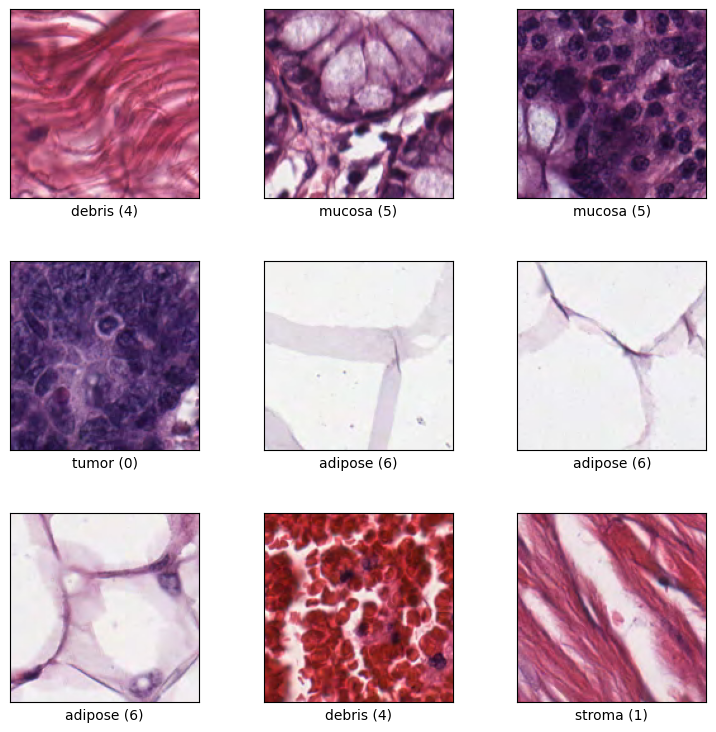

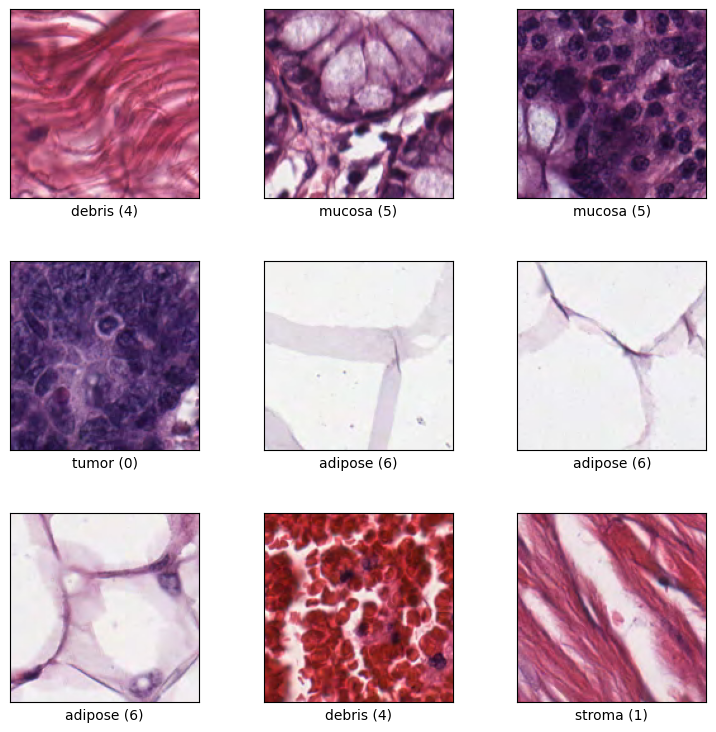

In [13]:
tfds.show_examples(ColTest,info2)

In [14]:
## Obtención de imágenes y etiquetas de entrenamiento

ColImTrain = np.array([img['image'].numpy()[:,:,0] for img in ColTrain])
ColLabTrain = np.array([label['label'] for label in ColTrain])

In [15]:
ColImTest = np.array([img['image'].numpy()[:,:,0] for img in ColTest])
ColLabTest = np.array([label['label'] for label in ColTest])

In [16]:
## Tamaño de imágenes
ColImTrain.shape

(750, 150, 150)

En este caso, todas las imágenes son regulares

In [17]:
## Etiquetas
np.unique(ColLabTrain)

array([0, 1, 2, 3, 4, 5, 6, 7])

Se tienen 8 categorías distintas:
* 0 = tumor
* 1 = stroma
* 2 = complejo
* 3 = linfa
* 4 = desecho
* 5 = mucosa
* 6 = adiposo
* 7 = vacío


## Ejercicio 2

Construya la arquitectura de la red neuronal a utilizar

### Dataset 1

In [18]:
### Se cambia el tamaño de todas las imágenes para poder analizar
for i in range(ImTrain.shape[0]):

  ImTrain[i] = cv2.resize(ImTrain[i],(200,200))


In [19]:
for i in range(MalTest.shape[0]):

  MalTest[i] = cv2.resize(MalTest[i],(200,200))


In [20]:
GrayTrain = np.zeros((ImTrain.shape[0],200,200))
for img in range (ImTrain.shape[0]):
  GrayTrain[img] = ImTrain[img].astype('float32')/255



In [21]:
GrayTest = np.zeros((MalTest.shape[0],200,200))
for img in range(MalTest.shape[0]):
  GrayTest[img] = MalTest[img].astype('float32')/255

In [22]:
# Modelo para este sistema
ModelMalaria = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=(2,2),strides = 2, input_shape = (200,200,1)),
    keras.layers.Conv2D(20,3,activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides = 2),
    keras.layers.Conv2D(45, 3, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')

])


In [23]:
ModelMalaria.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [24]:
ModelMalaria.fit(
    x = GrayTrain,
    y = LabTrain,
    batch_size = 40,
    epochs = 4
)

Epoch 1/4
138/138 [==============================] - 17s 24ms/step - loss: 0.7803 - accuracy: 0.5698
Epoch 2/4
138/138 [==============================] - 3s 23ms/step - loss: 0.6196 - accuracy: 0.6620
Epoch 3/4
138/138 [==============================] - 3s 24ms/step - loss: 0.5065 - accuracy: 0.7571
Epoch 4/4
138/138 [==============================] - 3s 24ms/step - loss: 0.3137 - accuracy: 0.8683


### Dataset2

In [25]:
## Las imágenes se convierten a escala de grises
ColImTrain = ColImTrain.astype('float32')/255
ColImTest = ColImTest.astype('float32')/255

In [26]:
# Modelo para este sistema
ModelColon = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=(2,2),strides = 2, input_shape = (150,150,1)),
    keras.layers.Conv2D(20,3,activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),strides = 2),
    keras.layers.Conv2D(45, 3, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(8, activation = 'softmax')

])

In [27]:
ModelColon.compile(
    optimizer = "adam",
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [28]:
ModelColon.fit(
    x = ColImTrain,
    y = ColLabTrain,
    batch_size = 20,
    epochs = 6
)

Epoch 1/6
38/38 [==============================] - 3s 15ms/step - loss: 1.8418 - accuracy: 0.2800
Epoch 2/6
38/38 [==============================] - 0s 11ms/step - loss: 1.1494 - accuracy: 0.4893
Epoch 3/6
38/38 [==============================] - 0s 11ms/step - loss: 0.9131 - accuracy: 0.6280
Epoch 4/6
38/38 [==============================] - 0s 11ms/step - loss: 0.7352 - accuracy: 0.7093
Epoch 5/6
38/38 [==============================] - 0s 11ms/step - loss: 0.6445 - accuracy: 0.7213
Epoch 6/6
38/38 [==============================] - 0s 11ms/step - loss: 0.4802 - accuracy: 0.8147


## Problema 3

Evaluación de los modelos obtenidos

### Dataset 1

In [29]:
ModelMalaria.evaluate( x = GrayTest, y = MLabTest)

44/44 [==============================] - 1s 9ms/step - loss: 0.8978 - accuracy: 0.6125


[0.897838830947876, 0.6124818325042725]

### Dataset 2

In [30]:
ModelColon.evaluate( x = ColImTest, y = ColLabTest)

79/79 [==============================] - 1s 6ms/step - loss: 1.1947 - accuracy: 0.6048


[1.194656491279602, 0.6047999858856201]

### Problema 4

Mejoras a los modelos planteados

### Dataset 1

### Dataset 2

## Problema 5

Discusión de resultados

### Dataset 1

### Dataset 2